# ***PROBLEM STATEMENT***
X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

# ***Business Goal***
X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# ***GOAL:***
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads, which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e., most likely to convert, whereas a lower score would mean that the lead is cold and will mostly not get converted.

# Steps Included:
1. Data Understanding and Analysis
2. Data Cleaning and Preparation
3. Model Building
4. Model Assessment
5. Model Evaluation

In [521]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [522]:
# Reading Data
lead_data = pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Understanding

In [523]:
# Checking shape
lead_data.shape

(9240, 37)

There are total **37 columns** and **9240 rows** in our dataset

In [524]:
# Checking info
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [525]:
# Checking statistical summary of numerical columns
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Checking coversion rate in dataset

In [526]:
round(lead_data['Converted'].sum()/len(lead_data),2)*100

39.0

Conversion rate is 39%.

# Cleaning Dataset

In [527]:
# Checking for duplicate values
lead_data.duplicated().sum()

0

There are no duplicate values in our dataset.

In [528]:
# Dropping 'Prospect ID' and 'Lead Number' since they are all uniques values and wong help in model building
lead_data = lead_data.drop(columns = ['Prospect ID', 'Lead Number'], axis=1)

In [529]:
# Checking Null Values
lead_data.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
I agree to pay the amount through cheque            0
A free copy of Mastering The

In [530]:
# Null count in percentage
round(100*lead_data.isnull().sum()/len(lead_data),2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
I agree to pay the amount through cheque          0.00
A free cop

Dropping 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Score','Asymmetrique Profile Index','Asymmetrique Activity Score' and 'Tags', Since they contains large number of null values are also wont be help in our analysis


In [531]:
# dropping columns with more than 35% null values
lead_data = lead_data.drop(columns = ['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Score','Asymmetrique Profile Index','Asymmetrique Activity Score', 'Tags'], axis=1)


In [532]:
# Null count in percentage after dropping columns
round(100*lead_data.isnull().sum()/len(lead_data),2).sort_values(ascending=False)

Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Re

Dropping 'Country' and 'City' since our business in online, we won't be needed country or state in our analysis

In [533]:
lead_data = lead_data.drop(columns = [ 'Country', 'City'], axis=1)


In [534]:
# Null count in percentage after dropping Country and City
round(100*lead_data.isnull().sum()/len(lead_data),2).sort_values(ascending=False)

Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Search                                            0.00
Newspaper 

In [535]:
# Checking number of unique values in each column
lead_data.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

The columns 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', and 'I agree to pay the amount through cheque' each contain only a single unique value across all rows.
Since these columns do not provide any variability, they do not contribute any meaningful information to the model. Therefore, we will remove them from the dataset.

In [536]:
lead_data = lead_data.drop(columns = [ 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [537]:
round(100*lead_data.isnull().sum()/len(lead_data),2).sort_values(ascending=False)

Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Lead Origin                                       0.00
Newspaper Article                                 0.00
Search                                            0.00
Total Time Spent on Website                       0.00
Converted 

#### Checking value counts in each column

In [538]:
for col in lead_data.select_dtypes(include='object').columns:
    print(lead_data[col].value_counts())
    print('------------------')

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
------------------
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
------------------
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
------------------
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64
------------------
Last Activity
Ema

The columns 'How did you hear about X Education', 'Lead Profile', and 'Specialization' contain the value 'Select', which likely indicates that the respondent did not choose any option.
To ensure consistency and accurate handling of missing data, we will replace all occurrences of 'Select' with null (NaN).

In [539]:
lead_data[['How did you hear about X Education', 'Lead Profile']] = lead_data[['How did you hear about X Education', 'Lead Profile']].replace('Select',np.nan)

We will not be changing Select from Specialization since it is an important column and we can lose a significant amount of data.

In [540]:
# Check null values again
round(100*lead_data.isnull().sum()/len(lead_data),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Lead Origin                                       0.00
Newspaper Article                                 0.00
Search                                            0.00
Total Time Spent on Website                       0.00
Converted 

Removing columns with more than 70% null values

In [541]:
lead_data = lead_data.drop(columns = ['How did you hear about X Education','Lead Profile'], axis=1)

In [542]:
# Check null values again
round(100*lead_data.isnull().sum()/len(lead_data),2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Newspaper Article                                 0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Lead Origin                                       0.00
Search                                            0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Ema

In [543]:
# Checking Value count again
for col in lead_data.select_dtypes(include='object').columns:
    print(lead_data[col].value_counts())
    print('------------------')

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
------------------
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
------------------
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
------------------
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64
------------------
Last Activity
Ema

Column 'Lead Source' contains both 'Google' and 'google'. We need to change 'google' to 'Google'

In [544]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace('google','Google')

In [545]:
# Checking Value count again
for col in lead_data.select_dtypes(include='object').columns:
    print(lead_data[col].value_counts())
    print('-'*50)

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
--------------------------------------------------
Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64
--------------------------------------------------
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
--------------------------------------------------
Do Not Call
No     9238
Yes 

Columns with significant data imbalance were removed, as they contribute little meaningful information to the analysis.

In [546]:
lead_data = lead_data.drop(columns = ['Do Not Call','What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'], axis=1)

In [547]:
# Checking Value count again
for col in lead_data.select_dtypes(include='object').columns:
    print(lead_data[col].value_counts())
    print('------------------')

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
------------------
Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64
------------------
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
------------------
Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973

In [548]:
# Check null values again
round(100*lead_data.isnull().sum()/len(lead_data),2).sort_values(ascending=False)

What is your current occupation           29.11
Specialization                            15.56
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

Columns such as ‘Specialization’, ‘What is your current occupation’, ‘TotalVisits’, ‘Page Views Per Visit’, ‘Last Activity’, and ‘Lead Source’ are considered important from a business perspective. Therefore, instead of dropping these columns, rows containing null values in these fields were removed.


In [549]:
# Dropping rows with null values
lead_data = lead_data.dropna()

In [550]:
# Check null values again
round(100*lead_data.isnull().sum()/len(lead_data),2).sort_values(ascending=False)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Now we don't have any null values.

Lets see how much data we are left with after data cleaning.


In [551]:
lead_data.shape

(6373, 12)

In [552]:
print(len(lead_data.index)*100/9240)

68.97186147186147


We still have around 69% of rows which seems good enough.

# Data Preparation

In [553]:
# Let's take a look
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


## Creating Dummy Variables

Creating dummy variables of categorical columns

In [554]:
# Getting all the categorical columns
cat_cols = lead_data.select_dtypes(include='object')
cat_cols.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [555]:
# Creating dummy variables
dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview',
                              'Last Notable Activity']], drop_first=True).astype(int)

# Add the results to the master dataframe
lead_data = pd.concat([lead_data, dummy], axis=1)

Since 'Specialization column contains 'Select', we will create its dummy variables separately and remove 'Specialization_Select' column from our table.

In [556]:
dummy1 = pd.get_dummies(lead_data['Specialization'], prefix='Specialization').astype(int)
dummy1.drop('Specialization_Select', axis=1, inplace=True)
lead_data = pd.concat([lead_data, dummy1], axis=1)

Dropping those variables whose dummy variables we have already created

In [557]:
lead_data = lead_data.drop(columns=['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis = 1)

In [558]:
lead_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Train-Test Split

We will split the data into two parts in 70:30:
1. Train - To train our model
2. Test - to test our model performance

First we will divide our columns as target variable an d predictor variables

In [559]:
# Storing predictable variables
X = lead_data.drop('Converted', axis=1)
X.head(1)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [560]:
# Storing target variable
y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [561]:
# Now splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

## Scaling Data
We also need to scale the continuous variables present in our dataset before building model.

In [562]:
# Scaling on x_train
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Checking Correlation

In [563]:
X_train.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
TotalVisits,1.000000,0.180396,0.435633,0.253439,-0.201371,-0.040149,0.069662,-0.040149,0.079346,-0.014172,...,0.018576,0.029421,-0.005065,0.041375,0.013192,0.004456,0.076798,0.026402,0.081599,0.053059
Total Time Spent on Website,0.180396,1.000000,0.317382,0.271853,-0.254398,-0.056578,0.112708,-0.056578,0.232249,-0.019972,...,0.020717,0.013033,0.054701,0.050156,0.054325,0.032314,0.017783,0.013438,0.036675,0.034180
Page Views Per Visit,0.435633,0.317382,1.000000,0.481898,-0.367005,-0.072056,0.103034,-0.072056,0.206739,-0.025436,...,0.063053,0.064399,0.029195,0.077295,0.040201,0.023451,0.027137,0.029267,0.052635,0.101226
Lead Origin_Landing Page Submission,0.253439,0.271853,0.481898,1.000000,-0.367172,-0.068330,0.504456,-0.068330,0.077192,-0.024120,...,0.143126,0.089828,0.087931,0.096703,0.093663,0.072809,0.053317,0.045601,0.108103,0.089308
Lead Origin_Lead Add Form,-0.201371,-0.254398,-0.367005,-0.367172,1.000000,-0.019342,-0.206074,-0.019342,-0.219566,0.065693,...,-0.043389,-0.039341,0.013114,-0.044722,-0.031309,-0.026390,-0.030276,-0.016743,-0.030714,-0.043358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,0.004456,0.032314,0.023451,0.072809,-0.026390,-0.007295,0.021212,-0.007295,0.020824,-0.002575,...,-0.026206,-0.018694,-0.041480,-0.018787,-0.030313,1.000000,-0.011420,-0.006315,-0.024862,-0.018319
Specialization_Rural and Agribusiness,0.076798,0.017783,0.027137,0.053317,-0.030276,-0.005634,0.035485,-0.005634,-0.033469,-0.001989,...,-0.020239,-0.014438,-0.032036,-0.014509,-0.023411,-0.011420,1.000000,-0.004877,-0.019201,-0.014148
Specialization_Services Excellence,0.026402,0.013438,0.029267,0.045601,-0.016743,-0.003116,0.043100,-0.003116,-0.026359,-0.001100,...,-0.011193,-0.007984,-0.017716,-0.008024,-0.012947,-0.006315,-0.004877,1.000000,-0.010618,-0.007824
Specialization_Supply Chain Management,0.081599,0.036675,0.052635,0.108103,-0.030714,0.006840,0.078224,0.006840,-0.015423,-0.004330,...,-0.044063,-0.031432,-0.069746,-0.031588,-0.050968,-0.024862,-0.019201,-0.010618,1.000000,-0.030802


With this our Data Preparation is finished. Now our data is ready for model building.

# Model Building
Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

### Running First Model

### Selecting features using RFE

In [564]:
# Creating instance for logistic regression
logreg = LogisticRegression(class_weight='balanced', random_state=100)

In [565]:
# running RFE with 15 variables as output
rfe = RFE(logreg,n_features_to_select= 15)

# Fitting data into model
rfe = rfe.fit(X_train, y_train)

In [566]:
# looking at the rank of each feature
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 54),
 ('Lead Source_Direct Traffic', False, 23),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Pay per Click Ads', False, 42),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 38),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 43),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 34),
 ('Lead Source_testone', False, 39),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 22),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [567]:
X_train = X_train.loc[:, rfe.support_]

### Assessing the model

Now that we have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels and check the p-values.

In [568]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Thu, 09 Oct 2025   Deviance:                       4145.5
Time:                        13:22:45   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

There are few values with p-values greater than 0.05, we need to take care of them. But, first let's check the VIFs.

In [569]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

# Display VIF
print(vif)

                                             Features    VIF
2                           Lead Origin_Lead Add Form  84.19
4                               Lead Source_Reference  65.18
5                        Lead Source_Welingak Website  20.03
11         What is your current occupation_Unemployed   3.65
7              Last Activity_Had a Phone Conversation   2.44
13     Last Notable Activity_Had a Phone Conversation   2.43
1                         Total Time Spent on Website   2.38
0                                         TotalVisits   1.62
8                              Last Activity_SMS Sent   1.59
12  What is your current occupation_Working Profes...   1.56
3                              Lead Source_Olark Chat   1.44
6                                    Do Not Email_Yes   1.09
10            What is your current occupation_Student   1.09
9           What is your current occupation_Housewife   1.01
14                  Last Notable Activity_Unreachable   1.01


'Lead Source_Reference' has a very high vif as well as p-values, thus we will drop this column.

In [570]:
X_train.drop('Lead Source_Reference', axis=1, inplace=True)

Let's again check for the p-values and vif.

In [571]:
# Building model and checking p-values
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Thu, 09 Oct 2025   Deviance:                       4146.5
Time:                        13:22:46   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [572]:
# Checking VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

# Display VIF
print(vif)

                                             Features   VIF
10         What is your current occupation_Unemployed  3.65
6              Last Activity_Had a Phone Conversation  2.44
12     Last Notable Activity_Had a Phone Conversation  2.43
1                         Total Time Spent on Website  2.38
2                           Lead Origin_Lead Add Form  1.71
0                                         TotalVisits  1.62
7                              Last Activity_SMS Sent  1.59
11  What is your current occupation_Working Profes...  1.56
3                              Lead Source_Olark Chat  1.44
4                        Lead Source_Welingak Website  1.33
5                                    Do Not Email_Yes  1.09
9             What is your current occupation_Student  1.09
8           What is your current occupation_Housewife  1.01
13                  Last Notable Activity_Unreachable  1.01


Now, we have every column with less than 5 VIF, but still few have p-value greater than 0.05. We need to drop them.

First, de will drop 'Last Notable Activity_Had a Phone Conversation'.

In [573]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis=1, inplace=True)

Let's again check the p-values

In [574]:
# Building model and checking p-values
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Thu, 09 Oct 2025   Deviance:                       4152.2
Time:                        13:22:46   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

In [575]:
# Dropping 'What is your current occupation_Housewife'
X_train.drop('What is your current occupation_Housewife', axis=1, inplace=True)

In [576]:
# Again building model and checking p-values
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Thu, 09 Oct 2025   Deviance:                       4156.7
Time:                        13:22:46   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

In [577]:
# Dropping 'What is your current occupation_Working Professional'
X_train.drop('What is your current occupation_Working Professional', axis=1, inplace=True)

In [578]:
# Again building model and checking p-values
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = logm5.fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Thu, 09 Oct 2025   Deviance:                       4158.1
Time:                        13:22:46   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

Now, each feature has a p-value less than 0.05. Let's check the VIF again one time to be sure.

In [579]:
# Checking VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

# Display VIF
print(vif)

                                      Features   VIF
9   What is your current occupation_Unemployed  2.82
1                  Total Time Spent on Website  2.00
0                                  TotalVisits  1.54
7                       Last Activity_SMS Sent  1.51
2                    Lead Origin_Lead Add Form  1.45
3                       Lead Source_Olark Chat  1.33
4                 Lead Source_Welingak Website  1.30
5                             Do Not Email_Yes  1.08
8      What is your current occupation_Student  1.06
6       Last Activity_Had a Phone Conversation  1.01
10           Last Notable Activity_Unreachable  1.01


Now that we have p-values and VIFs in appropriate range, we can continue with the next step: Model Evaluation.

## Model Evaluation

In [580]:
# Making predictions
y_train_pred = result.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

#### Creating a dataframe with the actual Convert flag and the predicted probabilities

In [581]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final.head()

,Convert,Convert_Prob
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795


Now, we need to find the optimal cutoff point of the convert probability, so we will fisrt use the 0.5 as the cutoff point and check the  

#### Let's first create new column 'predicted' with cutoff point as 0.5 as 1 if Convert_Prob > 0.5 else 0

In [582]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,predicted
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


### Checking confusion matrix

In [583]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[1929  383]
 [ 560 1589]]


In [584]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.7886124187401928


We have got an accuracy of almost 79% which is good.

## Metrics beyond simply accuracy
There are several other aspects we should check before making the final predictions. So lets check them

In [585]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### 1. Sensitivity

In [586]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.739413680781759

#### 2. Specificity

In [587]:
# Let us calculate specificity
TN / float(TN+FP)

0.8343425605536332

#### 3. False positive rate

In [588]:
# Calculate false positive rate - predicting convert when customer does not have converted
print(FP/ float(TN+FP))

0.1656574394463668


#### 4. Positive predictive value

In [589]:
# positive predictive value
print (TP / float(TP+FP))

0.8057809330628803


#### 5. Negative predictive value

In [590]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7750100441944556


## Plotting the ROC Curve

In [591]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [592]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

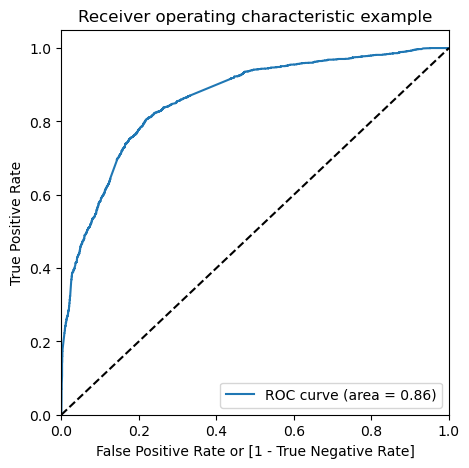

In [593]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

## Finding Optimal Cutoff Point

In [594]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


In [595]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.527012  0.994416  0.092561
0.2   0.2  0.698274  0.944160  0.469723
0.3   0.3  0.767541  0.865984  0.676038
0.4   0.4  0.791975  0.810610  0.774654
0.5   0.5  0.788612  0.739414  0.834343
0.6   0.6  0.757229  0.624011  0.881055
0.7   0.7  0.735037  0.543509  0.913062
0.8   0.8  0.711500  0.453234  0.951557
0.9   0.9  0.644026  0.279665  0.982699


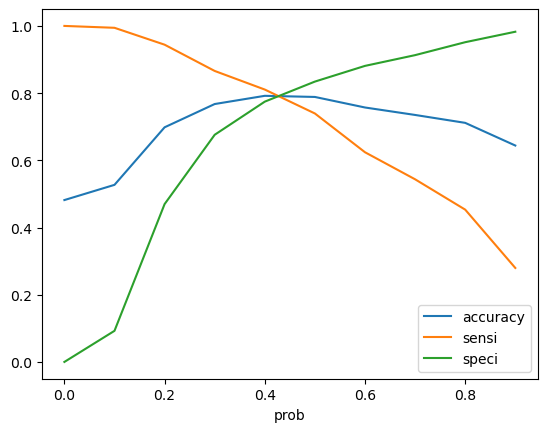

In [596]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As we can see that around 0.42, we get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [597]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], axis =1, inplace=True )
y_train_pred_final.head()

,Convert,Convert_Prob,predicted,final_predicted
0,0,0.300117,0,0
1,0,0.142002,0,0
2,1,0.127629,0,0
3,1,0.291558,0,0
4,1,0.954795,1,1


Converting Convert_prob to lead score from 0 to 100

In [598]:
y_train_pred_final['Lead Score'] = y_train_pred_final['Convert_Prob']*100
y_train_pred_final.head()

,Convert,Convert_Prob,predicted,final_predicted,Lead Score
0,0,0.300117,0,0,30.011695
1,0,0.142002,0,0,14.200165
2,1,0.127629,0,0,12.762885
3,1,0.291558,0,0,29.155814
4,1,0.954795,1,1,95.479546


In [599]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.7908540685944856

In [600]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[1823,  489],
       [ 444, 1705]], dtype=int64)

In [601]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [602]:
# Calculate Sensitivity

TP/(TP+FN)

0.793392275476966

In [603]:
# Calculate Specificity

TN/(TN+FP)

0.7884948096885813

This cutoff point seems good to go!

# Making Predictions on the Test Set

In [630]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,0,0,0,1,0,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,1,0
9202,0.015936,0.416813,0,0,0,0,0,1,0,1,0
6570,0.011952,0.378961,0,0,0,1,0,1,0,1,0
2668,0.031873,0.395246,0,0,0,0,0,1,0,1,0


In [606]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [609]:
# Selecting the same columns in x_test as x_train
X_test = X_test[X_train.columns]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,0,0,0,1,0,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,1,0
9202,0.015936,0.416813,0,0,0,0,0,1,0,1,0
6570,0.011952,0.378961,0,0,0,1,0,1,0,1,0
2668,0.031873,0.395246,0,0,0,0,0,1,0,1,0


In [611]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[X_train.columns])

### Making predictions on X_test

In [612]:
y_test_pred = result.predict(X_test_sm)
print(y_test_pred[:10])

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64


In [613]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head(10)

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796
4233,0.792250
3368,0.704038
9091,0.464521
5972,0.282978
3631,0.786460


In [614]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [615]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [616]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [617]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [618]:

# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Convert_Prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [619]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,Convert_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


Converting Convert_prob to lead score from 0 to 100

In [620]:
y_pred_final['Lead Score'] = y_pred_final['Convert_Prob']*100

In [621]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7845188284518828

Got an accuracy of 78.3%

### Checking confusion matrix

In [622]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[786, 210],
       [202, 714]], dtype=int64)

In [623]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [624]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7794759825327511

In [625]:
# Let us calculate specificity
TN / float(TN+FP)

0.7891566265060241

### Checking tradeoff

In [626]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

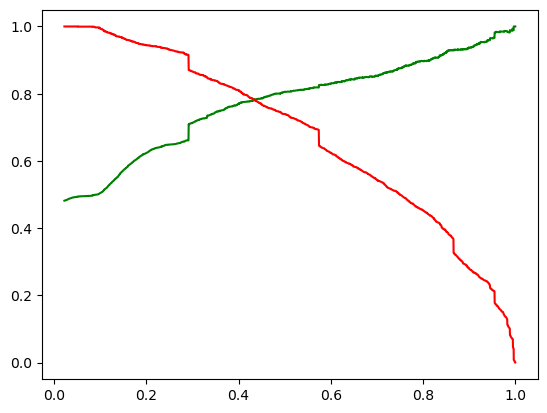

In [627]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [628]:
# Calculate Precision

TP/(TP+FP)

0.7727272727272727

In [629]:
# Calculate Recall

TP/(TP+FN)

0.7794759825327511

The cutoff point looks good